# Mandatory Assignment 2 by Carlos Reiakvam

**Problem text**
You are given a basic, bare-bones neural network written in Numpy. You will take basis in that code and add some modifications. These are as follows:

1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

2: Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.

3: Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?

In [696]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m
import time

np.random.seed(1)

### Activation functions

In [697]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [698]:
def relu(x):
    return (x > 0) * x


def relu_grad(x):
    return x > 0

### Training function

In [699]:
def nn_two_layers(epochs, act_func, act_func_grad, lr, n_hidden_nodes):
    errors = []
    ws_1 = np.random.rand(X.shape[1], n_hidden_nodes) - 0.5
    ws_2 = np.random.rand(n_hidden_nodes, y.shape[1]) - 0.5
    for epoch in range(epochs):  #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]):  #for all samples in X, each streetlight
            layer_in = X[i:i + 1]

            #forward pass/prediction
            layer_1 = act_func(layer_in.dot(ws_1))
            layer_out = layer_1.dot(ws_2)

            #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i + 1]  # error_ws2

            #calc the error each node in prev layer contributed, backpropagation
            delta_1 = delta_2.dot(ws_2.T) * act_func_grad(layer_1)  #ifht ws1

            #update weights
            ws_2 -= lr * (layer_1.T.reshape(n_hidden_nodes, 1).dot(delta_2))  #pred dot error_ws2
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))  #lay_in dot error_ws1

        if epoch % 10 == 0:  # at every tenth instance
            error = delta_2 ** 2
            errors.append(error[0][0])
    return errors

### Dataset initialization

In [700]:
streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1],
                         [1, 0, 1]])

In [701]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [702]:
X, y = streetlights, walk_vs_stop

### Setting weights

In [703]:
def init_weights():
    return ws_1, ws_2
[ws_1, ws_2] = init_weights()

### Adjustment global parameters

In [704]:
epochs = 1000  # number of iterations to go through the network. This is a global value for the entire notebook.
lr = 0.01  # how much we change the weights of the network each iteration
l1_nodes = 8
l2_nodes = 8

---
# Problem 1
1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

### Training with different activation functions

In [705]:
sigmoid_errors = nn_two_layers(epochs, sigmoid, sigmoid_diff, lr, 8)

In [706]:
relu_errors = nn_two_layers(epochs, relu, relu_grad, lr, 8)

### Investigating results of Sigmoid vs Relu

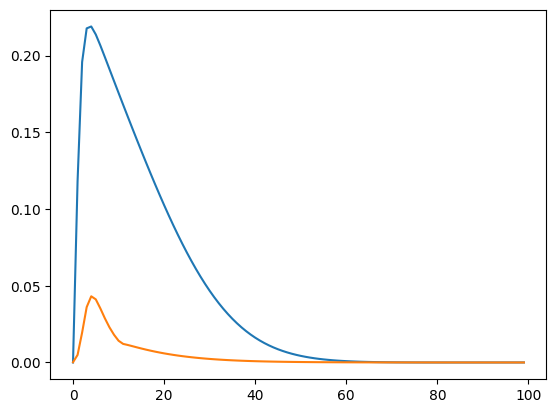

In [707]:
plt.plot(sigmoid_errors)
plt.plot(relu_errors)

### Comment on the findings
Looking at the plot and the comparison table we can see that although the sigmoid-errors start of pretty low they quickly ramp up, before descending again. The relu-errors on the other hand starts off lower, has less of a ramp up and also descends quicker than the sigmoid. Seemingly beating it in every way possible.

Based on what I have read, the sigmoid activation function is not very popular and I believe it has to do with the shape of the sigmoid, that makes it saturate for large positive and negative numbers. The gradient slope for these values are thus very gentle and therefore results in quite slow training.

---
# Problem 2
Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.

### Training neural network with different learning rates

In [708]:
lrs = [0.001, 0.01, 0.1, 1, 10]

errors = []
for lr in lrs:
    errors.append(nn_two_layers(epochs, relu, relu_grad, lr, 8))

In [709]:
errors_np = np.array(errors).T
df = pd.DataFrame(errors_np, columns=['0.001', '0.01', '0.1', '1', '10'])
df.head(20)

,0.001,0.01,0.1,1,10
0,0.027998,0.168378,1.331485e-01,0.226534,0.0
1,0.018060,0.037378,4.117278e-02,0.000000,0.0
2,0.010965,0.076872,3.384308e-04,0.000000,0.0
3,0.006027,0.061006,5.434134e-07,0.000000,0.0
4,0.002770,0.041355,1.046753e-05,0.000000,0.0
5,0.000860,0.026663,1.394629e-05,0.000000,0.0
6,0.000055,0.016874,1.447531e-05,0.000000,0.0
7,0.000127,0.010572,1.414190e-05,0.000000,0.0
8,0.000845,0.006615,1.358430e-05,0.000000,0.0
9,0.002143,0.004145,1.298673e-05,0.000000,0.0


<AxesSubplot: title={'center': 'error comparison using different learning rates and relu activation'}>

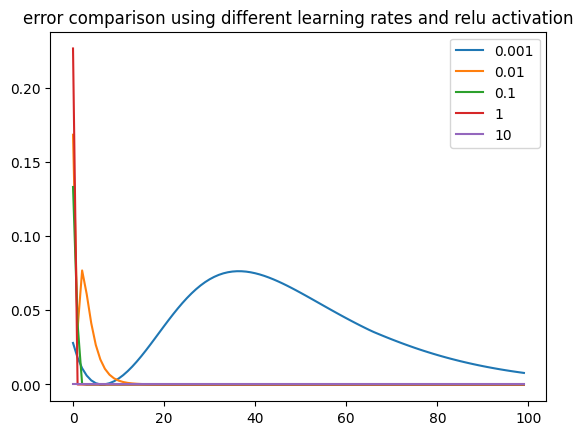

In [710]:
df.plot(title="error comparison using different learning rates and relu activation")

<AxesSubplot: title={'center': 'error comparison using different learning rates and relu activation zoomed in'}>

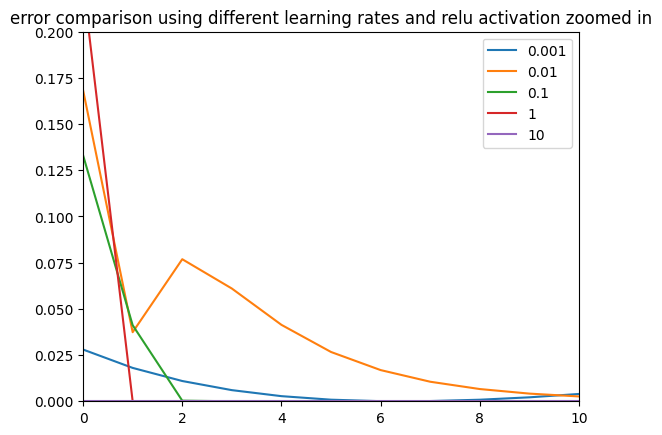

In [711]:
df.plot(title="error comparison using different learning rates and relu activation zoomed in", xlim=[0, 10], ylim=[0,0.2])

### Comment on findings of exercise 2
The errors for the different learning rates are a bit surprising.
- A learning rate of 1 and 10, seems like a choice not many people would consider, as it effectively kills of the gradient easing of the errors, resulting in seemingly abrupt miscalculations.
- A learning rate of 0.1 seems to be the quickest, but I have a feeling that it is a bit too steep.
- A learning rate of 0.01 seems like the most sane choice as it takes some time to settle but at least gets a bit of correction on the way
- A learning rate of 0.001 is perhaps more accurate over time, but it seems to take very many epochs to settle in.

For this kind of problem I believe I would go with a learning rate of 0.01

# Problem 3
Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?

### New function with two hidden layers

In [712]:
def nn_three_layers(epochs, act_func, a_func_grad, lr, n_nodes_l1, n_nodes_mid):
    # Setting weights
    ws_1 = np.random.rand(X.shape[1], n_nodes_l1) - 0.5
    ws_mid = np.random.rand(n_nodes_l1, n_nodes_mid) - 0.5
    ws_2 = np.random.rand(n_nodes_mid, y.shape[1]) - 0.5

    errors = []
    for epoch in range(epochs):  #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]):  #for all samples in X, each streetlight
            layer_in = X[i:i + 1]

            #forward pass/prediction
            layer_1 = act_func(layer_in.dot(ws_1))
            layer_mid = act_func(layer_1.dot(ws_mid))
            layer_out = layer_mid.dot(ws_2)

            #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i + 1]

            delta_mid = delta_2.dot(ws_2.T) * a_func_grad(layer_mid)
            delta_1 = delta_mid.dot(ws_mid.T) * a_func_grad(layer_1)

            #update weights
            ws_2 -= lr * (layer_mid.T.reshape(n_nodes_mid, 1).dot(delta_2))
            ws_mid -= lr * (layer_1.T.reshape(n_nodes_l1, 1).dot(delta_mid))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))

        if epoch % 10 == 0:  # at every tenth instance
            error = delta_2 ** 2
            errors.append(error[0][0])
    return errors

### Training with 2 hidden layers

In [713]:
lrs = [0.001, 0.01, 0.1] # excluding lr=1 and lr=10
errors = []
for lr in lrs:
    errors.append(nn_three_layers(epochs, relu, relu_grad, lr, l1_nodes, l2_nodes))

<AxesSubplot: >

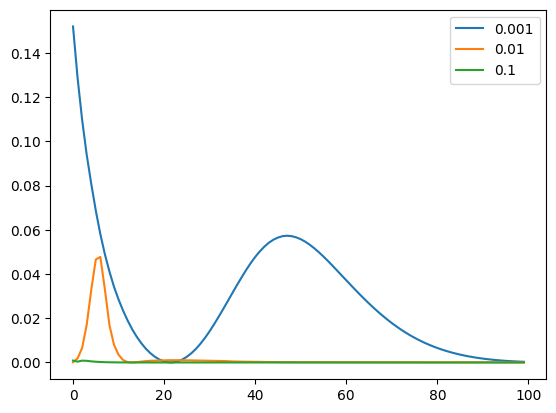

In [714]:
errors_np = np.array(errors).T
df = pd.DataFrame(errors_np, columns=['0.001', '0.01', '0.1'])
df.plot()

#### Thoughts on adding another hidden layer

I was at first a bit surprised to see that adding another layer did not increase the efficiency of the training.
Having thought about it and discussed it with other students I am partly convinced that it might result in a better generalization over time despite the slower training.
There is also a risk of overfitting, but I am not confident in judging whether this is the case in this instance.
Ideally I would like to train the model a lot more, using different epochs and number of nodes. Plotting all this data could potentially reveal more answers but is seemingly out of scope for this assignment.